<a href="https://colab.research.google.com/github/Ashwitha-Pabba/NLP/blob/main/ASSIGNMENT(4_2)TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Install & Import Required Libraries***

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


***Load the Dataset***

In [ ]:
import os

# Ensure clean download by removing existing file if present
if os.path.exists("IMDB Dataset.csv"):
  os.remove("IMDB Dataset.csv")

# Download the dataset from a public URL
!wget "https://raw.githubusercontent.com/laxmimerit/IMDB-Movie-Sentiment-Analysis/master/IMDB_Dataset.csv" -O "IMDB Dataset.csv"

# Verify if the file is now present and inspect its content
print(os.listdir('.'))
print("First 5 lines of IMDB Dataset.csv:")
!head -n 5 "IMDB Dataset.csv"

df = pd.read_csv("IMDB Dataset.csv")
df.head()

['.config', 'IMDB Dataset.csv', 'sample_data']


EmptyDataError: No columns to parse from file

***Separate Positive and Negative Reviews***

In [ ]:
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

print("Positive reviews:", len(positive_reviews))
print("Negative reviews:", len(negative_reviews))


NameError: name 'df' is not defined

**Download NLTK Stopwords**

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***Text Preprocessing Function***

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


***Apply Preprocessing***

In [ ]:
positive_clean = positive_reviews.apply(preprocess_text)
negative_clean = negative_reviews.apply(preprocess_text)


***Create Two TF-IDF Models***

In [ ]:
tfidf_pos = TfidfVectorizer(max_features=1000)
tfidf_neg = TfidfVectorizer(max_features=1000)

pos_tfidf_matrix = tfidf_pos.fit_transform(positive_clean)
neg_tfidf_matrix = tfidf_neg.fit_transform(negative_clean)


**Extract Top 15 TF-IDF Terms**

In [ ]:
def top_tfidf_terms(tfidf_matrix, feature_names, n=15):
    scores = np.mean(tfidf_matrix.toarray(), axis=0)
    tfidf_dict = dict(zip(feature_names, scores))
    return sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:n]

top_pos_terms = top_tfidf_terms(pos_tfidf_matrix, tfidf_pos.get_feature_names_out())
top_neg_terms = top_tfidf_terms(neg_tfidf_matrix, tfidf_neg.get_feature_names_out())


NameError: name 'pos_tfidf_matrix' is not defined

***Display Top Terms***

In [ ]:
print("Top 15 TF-IDF Terms in Positive Reviews")
for term, score in top_pos_terms:
    print(term, ":", round(score, 4))

print("\nTop 15 TF-IDF Terms in Negative Reviews")
for term, score in top_neg_terms:
    print(term, ":", round(score, 4))


Top 15 TF-IDF Terms in Positive Reviews
movie : 0.0733
film : 0.0714
one : 0.0461
like : 0.0362
good : 0.0347
great : 0.0334
story : 0.0309
see : 0.0297
time : 0.0281
really : 0.0279
well : 0.0273
would : 0.026
also : 0.0252
love : 0.025
best : 0.0239

Top 15 TF-IDF Terms in Negative Reviews
movie : 0.0831
film : 0.0656
one : 0.0454
like : 0.0417
bad : 0.0357
good : 0.0331
even : 0.0329
would : 0.0316
really : 0.03
time : 0.0282
see : 0.0267
story : 0.0264
dont : 0.026
much : 0.0252
get : 0.0248


***Visualization – Side-by-Side Bar Charts***

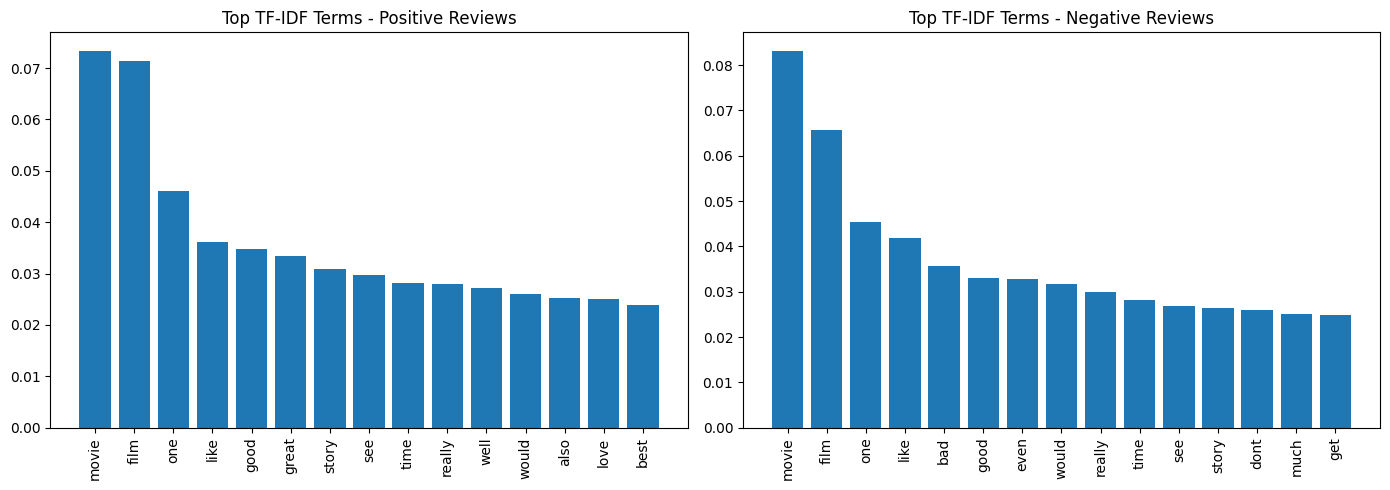

In [ ]:
pos_terms, pos_scores = zip(*top_pos_terms)
neg_terms, neg_scores = zip(*top_neg_terms)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.bar(pos_terms, pos_scores)
plt.xticks(rotation=90)
plt.title("Top TF-IDF Terms - Positive Reviews")

plt.subplot(1,2,2)
plt.bar(neg_terms, neg_scores)
plt.xticks(rotation=90)
plt.title("Top TF-IDF Terms - Negative Reviews")

plt.tight_layout()
plt.show()
